In [1]:
"""
优化参数使用
"""
from datetime import datetime
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting

from research_strategies.breaker.r_break_strategy_5 import RBreakStrategy
# from research_strategies.turtle.turtle_strategy_3 import TurtleStrategy

In [5]:
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="RB8888.SHFE",
    interval="1m",
    start=datetime(2018, 1, 1),
    end=datetime(2019, 12, 30),
    rate=0.3/10000,  # 保证金比例
    slippage=0.2,  # 滑点
    size=10,  # 合约乘数
    pricetick=0.2,
    capital=1_000_000,
)
engine.add_strategy(RBreakStrategy, {
    'break_rate': 0.4,
    'stop_rate': 0.4,
    'tend_length': 20,
    'fixed_size': 200,
})

2019-12-26 20:57:02.633202	开始加载历史数据
2019-12-26 20:57:02.639187	历史数据加载完成，数据量：157710
2019-12-26 20:57:02.674131	策略初始化完成
2019-12-26 20:57:02.674131	开始回放历史数据
2019-12-26 20:57:07.300211	历史数据回放结束
2019-12-26 20:57:07.301148	开始计算逐日盯市盈亏
2019-12-26 20:57:07.307137	逐日盯市盈亏计算完成
2019-12-26 20:57:07.308130	开始计算策略统计指标
2019-12-26 20:57:07.315110	------------------------------
2019-12-26 20:57:07.315110	首个交易日：	2018-01-16
2019-12-26 20:57:07.315110	最后交易日：	2019-11-26
2019-12-26 20:57:07.315110	总交易日：	452
2019-12-26 20:57:07.315110	盈利交易日：	117
2019-12-26 20:57:07.315110	亏损交易日：	128
2019-12-26 20:57:07.315110	起始资金：	1,000,000.00
2019-12-26 20:57:07.315110	结束资金：	2,618,747.12
2019-12-26 20:57:07.315110	总收益率：	161.87%
2019-12-26 20:57:07.315110	年化收益：	85.95%
2019-12-26 20:57:07.315110	最大回撤: 	-273,367.27
2019-12-26 20:57:07.315110	百分比最大回撤: -13.49%
2019-12-26 20:57:07.315110	最长回撤天数: 	36
2019-12-26 20:57:07.315110	总盈亏：	1,618,747.12
2019-12-26 20:57:07.315110	总手续费：	167,576.88
2019-12-26 20:57:07.315110	总滑点：	302,400.00
2

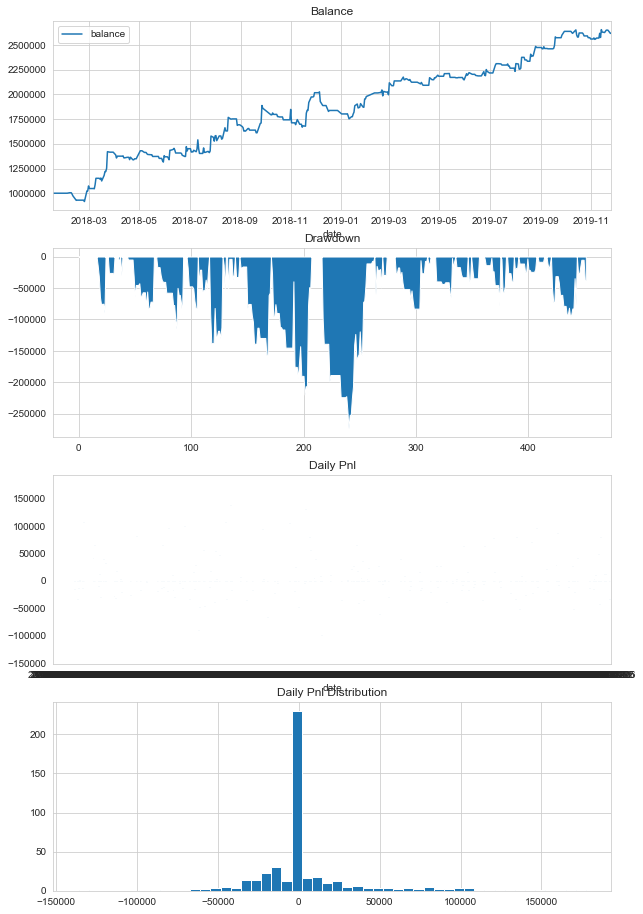

In [6]:
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [4]:
setting = OptimizationSetting()
setting.set_target("sharpe_ratio")
setting.add_parameter("break_rate", 0.1, 1, 0.1)

engine.run_ga_optimization(setting)

2019-12-26 20:48:03.991046	参数优化空间：10
2019-12-26 20:48:03.991046	每代族群总数：100
2019-12-26 20:48:03.991046	优良筛选个数：80
2019-12-26 20:48:03.991046	迭代次数：30
2019-12-26 20:48:03.991046	交叉概率：95%
2019-12-26 20:48:03.991046	突变概率：5%
2019-12-26 20:48:03.991046	开始加载历史数据
2019-12-26 20:48:03.999023	历史数据加载完成，数据量：157710
2019-12-26 20:48:04.031981	策略初始化完成
2019-12-26 20:48:04.032936	开始回放历史数据
2019-12-26 20:48:09.133352	历史数据回放结束
2019-12-26 20:48:09.133352	开始计算逐日盯市盈亏
2019-12-26 20:48:09.139282	逐日盯市盈亏计算完成
2019-12-26 20:48:09.139282	开始计算策略统计指标
2019-12-26 20:48:09.147267	开始加载历史数据
2019-12-26 20:48:09.154243	历史数据加载完成，数据量：157710
2019-12-26 20:48:09.210096	策略初始化完成
2019-12-26 20:48:09.211090	开始回放历史数据
2019-12-26 20:48:14.386261	历史数据回放结束
2019-12-26 20:48:14.386261	开始计算逐日盯市盈亏
2019-12-26 20:48:14.392240	逐日盯市盈亏计算完成
2019-12-26 20:48:14.392240	开始计算策略统计指标
2019-12-26 20:48:14.399222	开始加载历史数据
2019-12-26 20:48:14.403210	历史数据加载完成，数据量：157710
2019-12-26 20:48:14.428633	策略初始化完成
2019-12-26 20:48:14.428633	开始回放历史数据
2019-12-26 20:48:19.

ValueError: empty range for randrange() (1,1, 0)